### Домашнее задание 4. Оганян Роберт

#### Постановка задачи

1. Написать функции для подсчета следующих выборочных числовых
характеристик многомерных случайных величин: математическое
ожидание, ковариация, ковариационная матрица, коэффициент
корреляции, матрица коэффициентов корреляции.
Для подсчета каждой характеристики необходима отдельная функция.
При написании не использовать библиотечные функции подсчета
числовых характеристик.
2. Проверить правильность работы функций, сравнив их выходы с
выходами функций библиотеки numpy на примере выборочных данных,
полученных по результатам наблюдений за величинами
χ – степень серьезности аварии, ξ – видимость дороги, ζ – скорость ветра,
ς – влажность, γ – температура в момент совершения аварии
3. Построить диаграммы рассеивания для всевозможных пар
случайных величин χ, ξ, ζ, ς, γ.
Сделать выводы о влиянии величин друг на друга.
4. Построить диаграммы рассеивания для определения зависимости
величины χ – степень серьезности аварии от факторов, выраженных
в качественных данных: отметки о наличии вблизи места аварии
лежачего полицейского, перекрестка, знака «Уступи дорогу»,
транспортной развязки, знака «нет выхода», железнодорожных путей,
кругового движения, остановки общественного транспорта (автобусов,
поездов и т.п.), знака «стоп», знаков или других мер успокоения
движения, светофоров, поворотной петли.
Сделать выводы о влиянии указанных факторов на степень
серьезности аварии

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("../data/02_car_accidents.xlsx")
data

,ID,Source,TMC,Severity,Start_Time,End_Time,Distance(mi),Description,Street,Side,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,R,...,False,False,False,False,False,False,False,False,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,L,...,False,False,False,False,False,False,False,False,Night,Night
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,...,False,False,False,False,False,False,True,False,Night,Night
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,...,False,False,False,False,False,False,False,False,Night,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,...,False,False,False,False,False,False,True,False,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,A-4996,MapQuest,201.0,2,2016-08-01 11:35:41,2016-08-01 12:05:41,0.00,Accident on Cold Springs Rd at Middletown Rd.,Cold Springs Rd,R,...,False,False,False,False,False,False,False,False,Day,Day
4996,A-4997,MapQuest,201.0,2,2016-08-01 11:41:23,2016-08-01 12:26:23,0.00,Accident on Travis Blvd at Holiday Ln.,Travis Blvd,R,...,False,False,False,False,False,False,True,False,Day,Day
4997,A-4998,MapQuest,201.0,2,2016-08-01 11:57:27,2016-08-01 12:42:27,0.00,Accident on River Rd at Orchard Rd.,River Rd,L,...,False,False,False,False,False,False,False,False,Day,Day
4998,A-4999,MapQuest,201.0,2,2016-08-01 12:00:54,2016-08-01 12:30:54,0.00,Accident on Marconi Ave at Bell St.,Bell St,R,...,False,False,False,False,False,False,False,False,Day,Day


### Задание 1. Подсчет выбранных числовых характеристик

Написать функции для подсчета следующих выборочных числовых характеристик многомерных случайных величин: математическое ожидание, ковариация, ковариационная матрица, коэффициент корреляции, матрица коэффициентов корреляции. Для подсчета каждой характеристики необходима отдельная функция. При написании не использовать библиотечные функции подсчета числовых характеристик.

Матемтическое ожидание

In [38]:
def sample_moment(X, k):
    sum = 0
    for elem in X:
        sum+= elem ** k
        
    return sum / len(X)

In [39]:
def mean(x):
    return sample_moment(x, 1)

def mean_ds(dataset):
    result = []
    for sample in dataset:
        result.append(mean(sample))
    return result

Ковариация

In [4]:
def cov(x,y):
    sum = 0
    mean_x = sample_moment(x, 1)
    mean_y = sample_moment(y, 1)
    
    for i in range(len(x)):
        sum += (x[i] - mean_x) * (y[i] - mean_y)
        
    return sum / len(x)

Ковариационная матрица

In [32]:
def cov_matrix(dataset):
    result = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            result[i, j] = cov(dataset[i], dataset[j])
    return result

Коэффициент корреляции

In [36]:
def variance(x):
    return sample_moment(x, 2) - sample_moment(x, 1) ** 2

def corr(x, y):
    return cov(x, y) / (variance(x) * variance(y)) ** 0.5

Матрица коэффициентов корреляции

In [34]:
def corr_matrix(dataset):
    result = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(dataset.shape[0]):
            result[i, j] = corr(dataset[i], dataset[j])
    return result

### Задание 2.
Проверить правильность работы функций, сравнив их выходы с выходами функций библиотеки numpy на примере выборочных данных, полученных по результатам наблюдений за величинами χ – степень серьезности аварии, ξ – видимость дороги, ζ – скорость ветра, ς – влажность, γ – температура в момент совершения аварии

In [8]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

In [26]:
data2 = data[["Severity", "Visibility(mi)", "Wind_Speed(mph)",
               "Humidity(%)", "Temperature(F)"]].dropna()

In [28]:
data2

,Severity,Visibility(mi),Wind_Speed(mph),Humidity(%),Temperature(F)
2,2,10.0,3.5,100.0,36.0
3,3,9.0,4.6,96.0,35.1
4,2,6.0,3.5,89.0,36.0
5,3,7.0,3.5,97.0,37.9
6,2,7.0,3.5,100.0,34.0
...,...,...,...,...,...
4995,2,10.0,6.9,20.0,86.0
4996,2,10.0,9.2,63.0,68.0
4997,2,10.0,3.5,59.0,68.0
4998,2,7.0,6.9,34.0,80.6


Нет смысла отдельно сравнивать функции подсчета корреляции и ковариации. Сразу сравним функции подсчета ковариационной матрицы и корреляционной матрицы

In [58]:
def compare_funcs(true, my, ds_true, ds_my, name, eps = 1e-1):
    res_true = true(ds_true)
    res_my = my(ds_my)
    print("Встроенная функция: \n" + str(res_true))
    print("Моя функция: \n" + str(res_my))
    assert(np.allclose(res_true, res_my, atol=eps))
#     assert(abs(res_true- res_my) <= eps)
    print(name + " работает верно")

In [66]:
compare_funcs(np.mean, mean_ds, data2, data2.values.T, name = "Математическое ожидание", eps = 1e-3)
print(sep = "")

compare_funcs(np.cov, cov_matrix, data2.T, data2.values.T, name = "Ковариационная матрица", eps = 0.2)
print(sep = "")

compare_funcs(np.corrcoef, corr_matrix, data2.T, data2.values.T, name = "Корреляционная матрица", eps = 1e-3)
print(sep = "")

Встроенная функция: 
Severity            2.422439
Visibility(mi)      9.469772
Wind_Speed(mph)     9.410246
Humidity(%)        51.027661
Temperature(F)     70.287586
dtype: float64
Моя функция: 
[2.422438592608984, 9.469772073467581, 9.410245629564091, 51.027660986944014, 70.28758574905973]
Математическое ожидание работает верно

Встроенная функция: 
[[ 2.47579621e-01  3.82924107e-02  1.79756771e-01  4.48914382e-01
  -1.04471269e-01]
 [ 3.82924107e-02  3.42579258e+00  4.35475775e-01 -1.78702792e+01
   1.56500651e+01]
 [ 1.79756771e-01  4.35475775e-01  1.86122213e+01 -3.45145655e+00
  -1.40489713e+00]
 [ 4.48914382e-01 -1.78702792e+01 -3.45145655e+00  5.64037969e+02
  -3.71785181e+02]
 [-1.04471269e-01  1.56500651e+01 -1.40489713e+00 -3.71785181e+02
   3.42310441e+02]]
Моя функция: 
[[ 2.47524834e-01  3.82839371e-02  1.79716993e-01  4.48815042e-01
  -1.04448151e-01]
 [ 3.82839371e-02  3.42503449e+00  4.35379410e-01 -1.78663247e+01
   1.56466020e+01]
 [ 1.79716993e-01  4.35379410e-01  1.

### Задание 3.
Построить диаграммы рассеивания для всевозможных пар случайных величин χ, ξ, ζ, ς, γ. Сделать выводы о влиянии величин друг на друга.

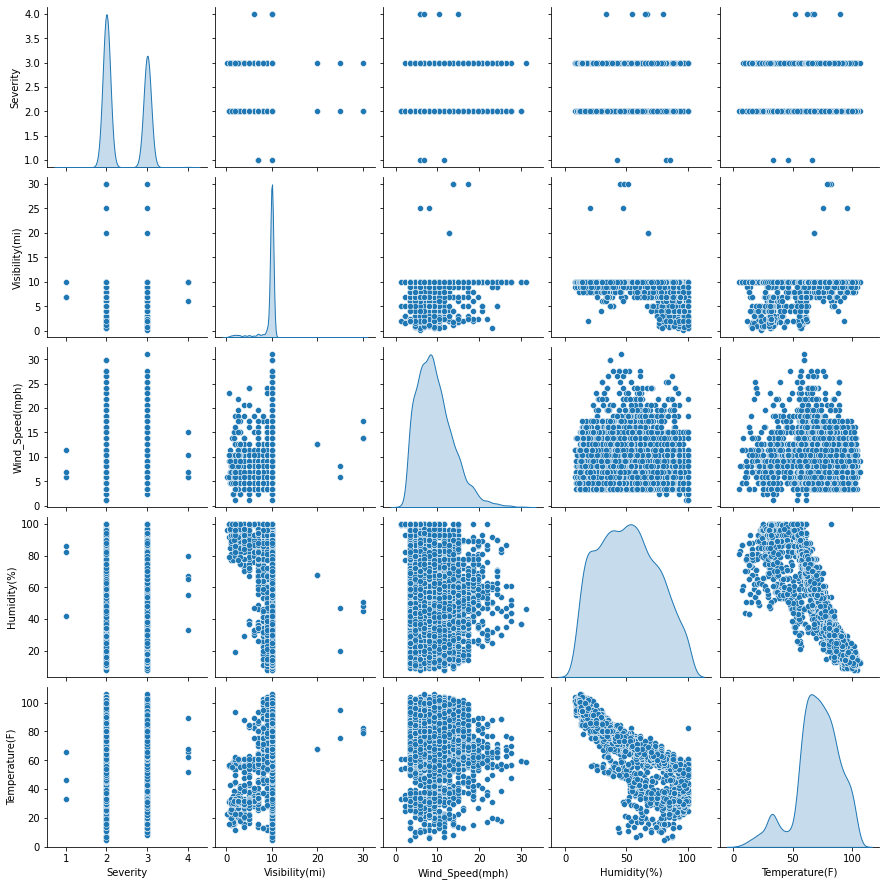

In [69]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
sns.pairplot(data2, diag_kind="kde")

Первичные статистические выводы:

1. Практически все аварии происходят с видимостью <= 10. Возможно это означает, что если водитель видит больше 10 метров перед собой, то у него есть время затормозить и предотвратить аварию.
2. Средняя скорость ветра при авариях 10 mph.
3. Средняя температура при авариях 65F.
4. Аварии практически не происходят при видимости больше 10 метров.
5. Чем выше температура тем меньше % влажности (обратная зависимость).

### Задание 4.
Построить диаграммы рассеивания для определения зависимости величины χ – степень серьезности аварии от факторов, выраженных в качественных данных: отметки о наличии вблизи места аварии лежачего полицейского, перекрестка, знака «Уступи дорогу», транспортной развязки, знака «нет выхода», железнодорожных путей, кругового движения, остановки общественного транспорта (автобусов, поездов и т.п.), знака «стоп», знаков или других мер успокоения движения, светофоров, поворотной петли. Сделать выводы о влиянии указанных факторов на степень серьезности аварии

In [70]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Distance(mi)', 'Description', 'Street', 'Side', 'City', 'State',
       'Zipcode', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight'],
      dtype='object')

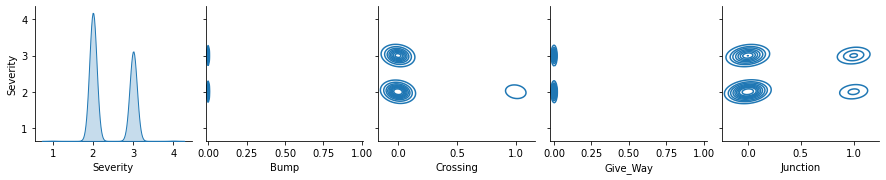

In [86]:
data3 = data[["Severity", "Bump", "Crossing", "Give_Way", "Junction"]].astype(int).dropna()
sns.pairplot(data3, y_vars=["Severity"], kind="kde")

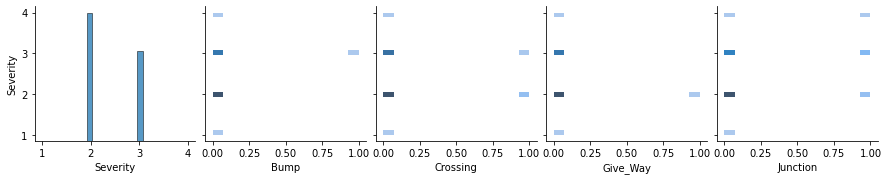

In [87]:
sns.pairplot(data3, y_vars=["Severity"], kind="hist")

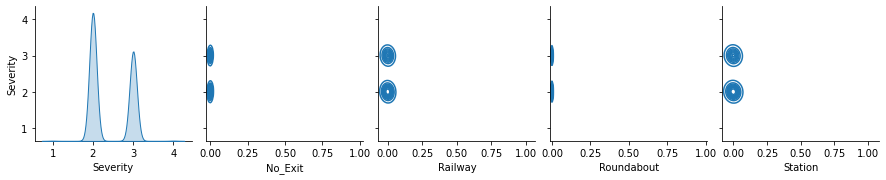

In [89]:
data3 = data[["Severity",  "No_Exit", "Railway",  "Roundabout", "Station"]].astype(int).dropna()
sns.pairplot(data3, y_vars=["Severity"], kind="kde")                                      

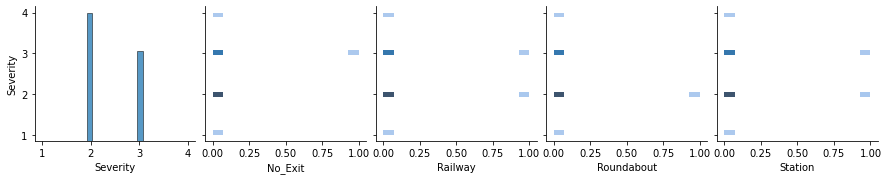

In [90]:
sns.pairplot(data3, y_vars=["Severity"], kind="hist")

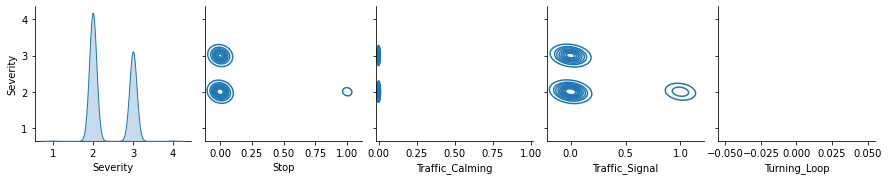

In [91]:
data3 = data[["Severity", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]].astype(int).dropna()
sns.pairplot(data3, y_vars=["Severity"], kind="kde")                                      

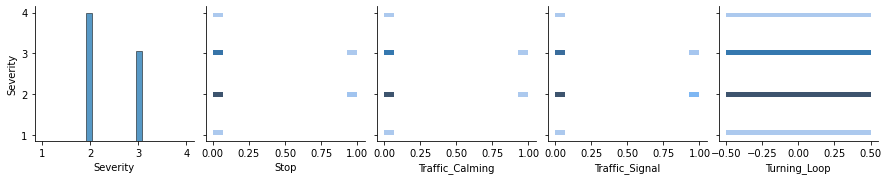

In [92]:
sns.pairplot(data3, y_vars=["Severity"], kind="hist")

Первичные статистические выводы:

1. Самые серьезные аварии происходят на перекрестах, транспортных развязках.
2. Лежачий полицейский, знак "Тупик", знак "Стоп", наличие светофоров не умнеьшают серьезность аварий.
3. Знаки "Уступи дорогу" и Круговые перекрёстки помогают уменьшить серьезность аварий